Stando alla docuemntazione:
- Git: https://github.com/JaidedAI/EasyOCR
- Video: https://www.youtube.com/watch?v=w3zYRLxj7MQ&list=PLEJK-H61Xlwx2Z_h8inBuC3yTPA5fEjVs&index=2&ab_channel=VenelinValkov
- Seguire i video successivi se interessa fare classificazione dell'intero documento

EasyOCR dovrebbe permetterci di ottenere un output composto da testo estratto e relative bounding box, possono essere utili per risolvere questo problema:

Quando faccio le annotazioni con label studio, e creo il datatset, il dataset deve avere anche il token (testo estratto contenuto nei vari box), quindi devo applicare un OCR per estrarre il testo, di conseguenza o si trova un tool che permetta di creare i vari box  ed estrarre il testo direttamente (forse UBIAI lo fa) oppure va creato un codice che partendo dall'output di label studio (immagine con annotazioni - box in formato json ) e l'immagine, permetta di estrarre il testo contenuto nelle box e riscrivere il JSON con tutte le informazioni --> forse EasyOCR fa al caso nostro 

- Requisiti

In [1]:
# pip install easyocr
# pip install easyocr[italian]

In [9]:
""" !ls "{cv2.__path__[0]}/qt/fonts" """

"ls" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


Librerie

In [2]:
from PIL import Image, ImageDraw, ImageFont
import easyocr
import matplotlib.pyplot as plt


In [3]:
reader = easyocr.Reader(['it', 'en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [4]:
image_path = "C:/Users/TirocinioMatteo/Desktop/Matteo/Python_3/Vai/ai/PDF/0_documentazione/input_doc/hype_account_balance_images/all_images/6C554FC0-10D0-4655-B8DA-CDF3C2F32FE6_page-0003.jpg"
result = reader.readtext(image_path)

In [5]:
print(result)

[([[120, 122], [172, 122], [172, 148], [120, 148]], 'Data', 0.9999393820762634), ([[260, 122], [312, 122], [312, 146], [260, 146]], 'Data', 0.8688276504481904), ([[376, 118], [477, 118], [477, 154], [376, 154]], 'Tipologia', 0.9358595274518688), ([[560, 122], [624, 122], [624, 146], [560, 146]], 'Nome', 0.9998517036437988), ([[742, 122], [862, 122], [862, 146], [742, 146]], 'Descrizione', 0.9999262073247356), ([[926, 122], [1006, 122], [1006, 148], [926, 148]], 'Importo', 0.9988824779180283), ([[87, 144], [202, 144], [202, 174], [87, 174]], 'operazione', 0.9955163612784584), ([[238, 146], [334, 146], [334, 172], [238, 172]], 'contabile', 0.9999759593154514), ([[103, 205], [187, 205], [187, 225], [103, 225]], '15/03/2023', 0.9974824816073788), ([[245, 205], [329, 205], [329, 225], [245, 225]], '17/03/2023', 0.9999404372551618), ([[385, 205], [470, 205], [470, 229], [385, 229]], 'Pagamento', 0.9082317600588266), ([[527, 205], [659, 205], [659, 225], [527, 225]], 'Mercadona el Clot', 0.89

In [6]:
for (bbox, text, prob) in result:
    print(f'Text: {text}, Probability: {prob}')

Text: Data, Probability: 0.9999393820762634
Text: Data, Probability: 0.8688276504481904
Text: Tipologia, Probability: 0.9358595274518688
Text: Nome, Probability: 0.9998517036437988
Text: Descrizione, Probability: 0.9999262073247356
Text: Importo, Probability: 0.9988824779180283
Text: operazione, Probability: 0.9955163612784584
Text: contabile, Probability: 0.9999759593154514
Text: 15/03/2023, Probability: 0.9974824816073788
Text: 17/03/2023, Probability: 0.9999404372551618
Text: Pagamento, Probability: 0.9082317600588266
Text: Mercadona el Clot, Probability: 0.8939173973899512
Text: MERCADONA EL CLOT, Probability: 0.9190267020647533
Text: 52,86€, Probability: 0.9960679113290862
Text: LLEIDA, Probability: 0.9235803181305674
Text: 15/03/2023, Probability: 0.6433421630335115
Text: 18/03/2023, Probability: 0.9999505027498512
Text: Pagamento, Probability: 0.8014883163260623
Text: Alliance Vending, Probability: 0.7394965117851312
Text: ALLIANCE VENDING, Probability: 0.897633737551911
Text: 0

In [7]:
def create_bounding_box(bbox_data):
    xs=[]
    ys=[]

    for x,y in bbox_data:
        xs.append(x)
        ys.append(y)

    left = min(xs)
    top = min(ys)
    right = max(xs)
    bottom = max(ys)
    
    return (left, top, right, bottom)

(-0.5, 1240.5, 1753.5, -0.5)

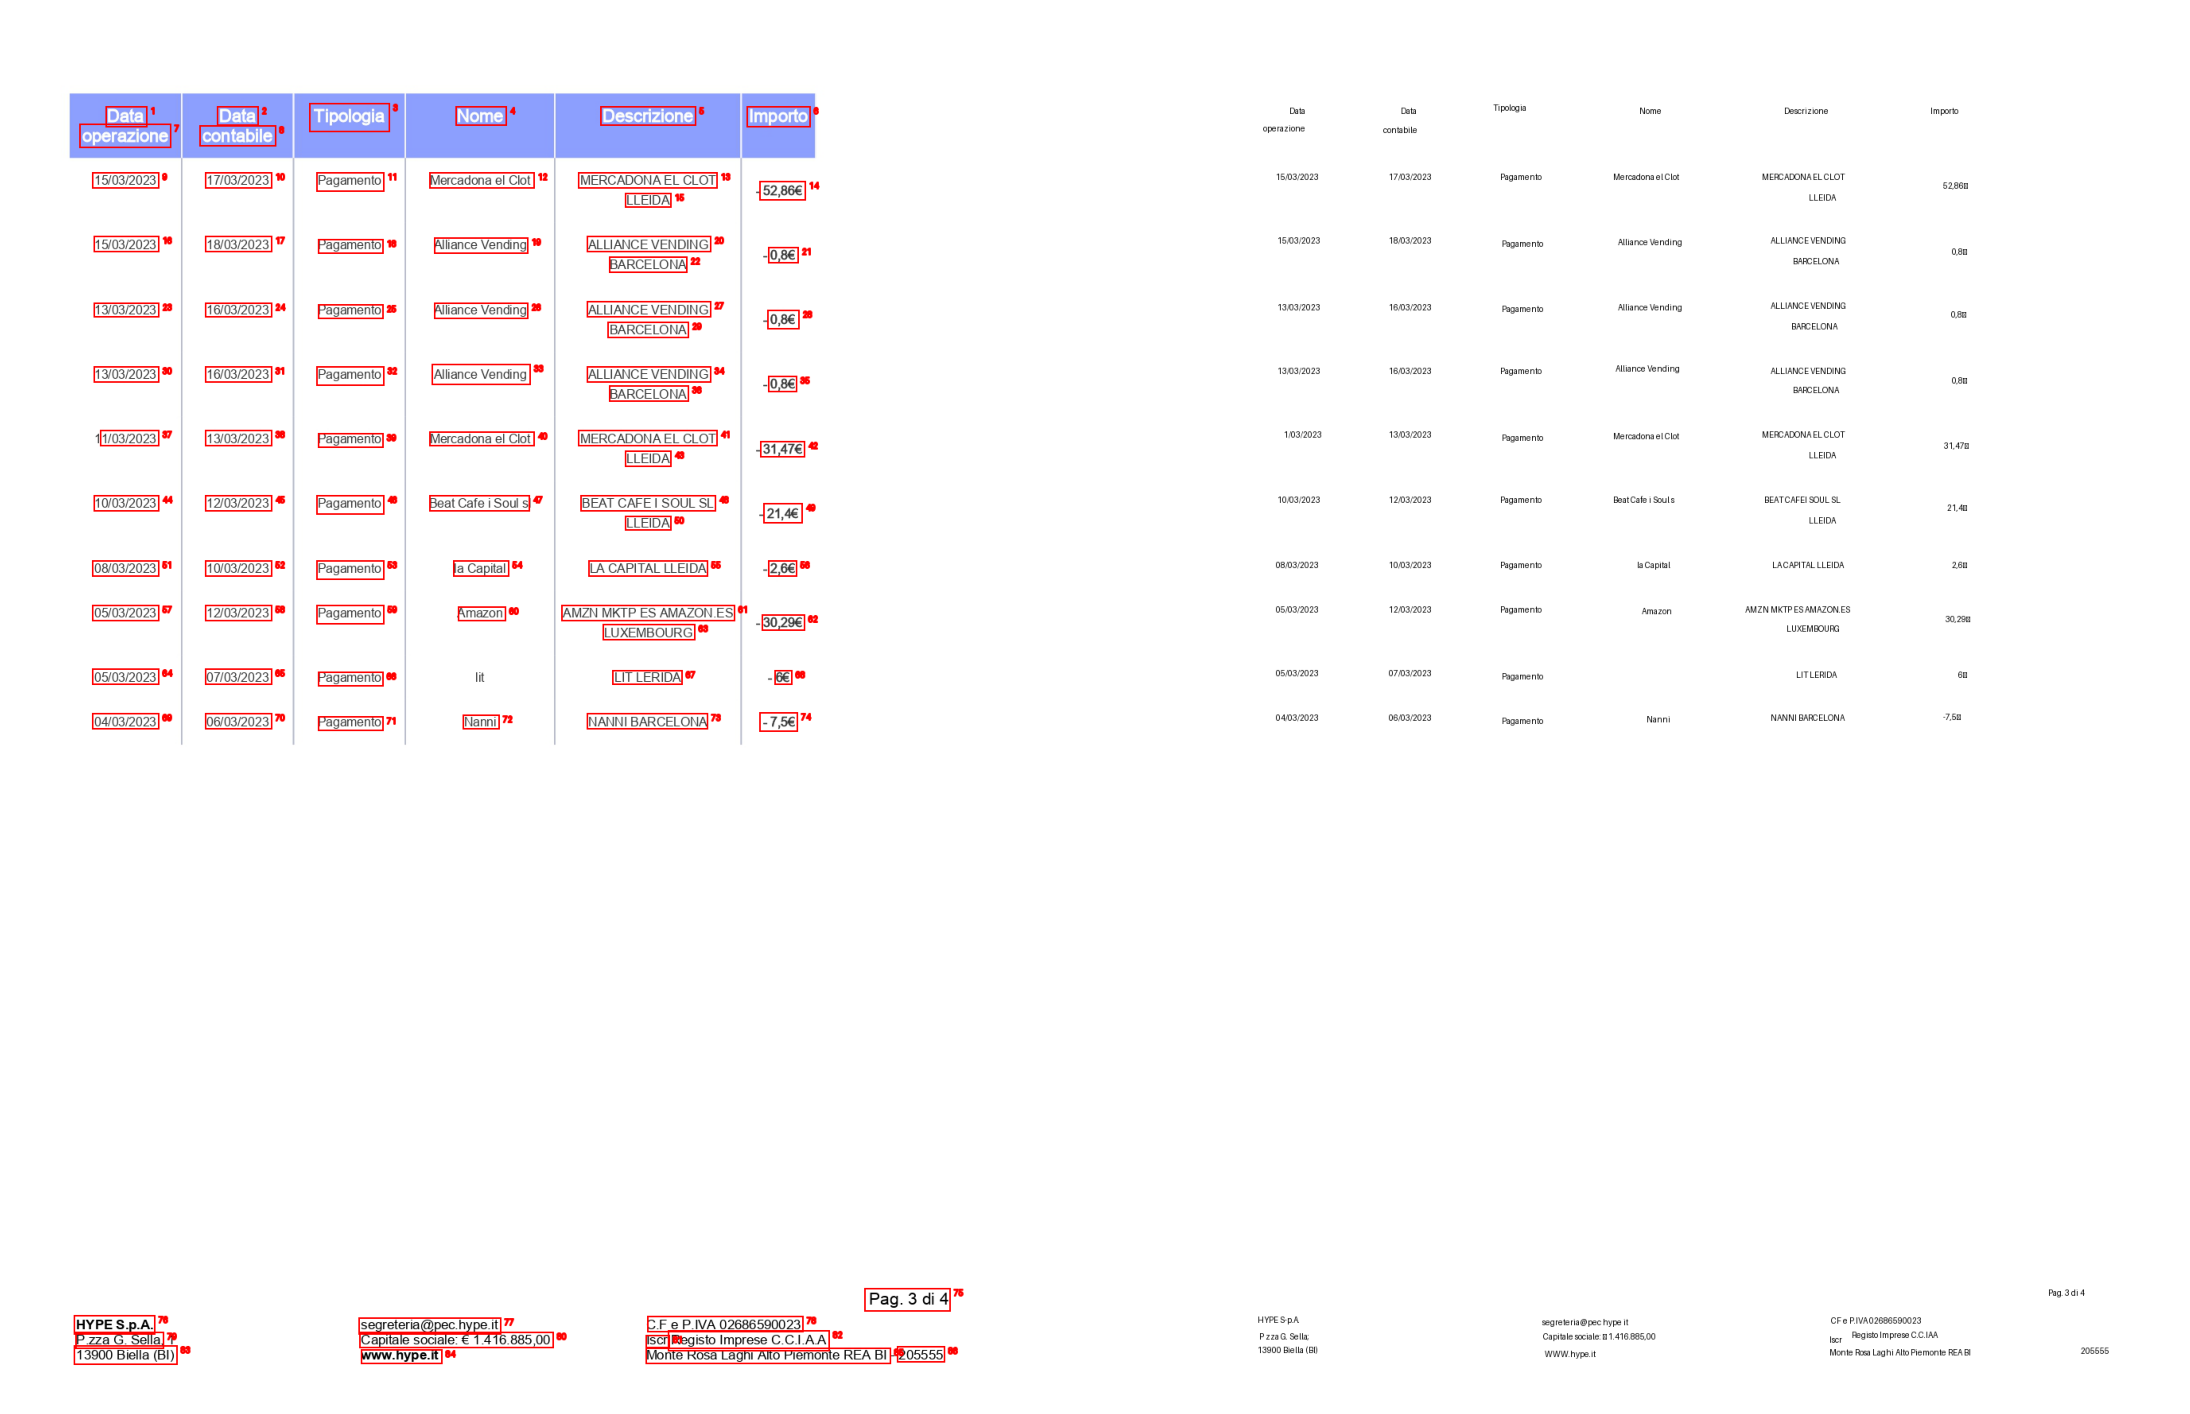

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 28))

left_image= Image.open(image_path).convert("RGB")
right_image= Image.new("RGB", left_image.size, (255,255,255))

left_image_draw = ImageDraw.Draw(left_image)
right_image_draw = ImageDraw.Draw(right_image)

for i, (bbox, text, prob) in enumerate(result):
    box= create_bounding_box(bbox)
    left_image_draw.rectangle(box, outline='red', width=2)
    left, top, right, bottom = box
    left_image_draw.text((right+5, top), text=str(i+1), fill='red',  stroke_width=1) # non ho ancora definito il font
    right_image_draw.text((left, top), 
                          text=text, 
                          fill='black') 

ax1.imshow(left_image)
ax2.imshow(right_image)
ax1.axis('off')
ax2.axis('off')

